#開始

In [1]:
import csv
import pandas as pd
import os
import glob
encoding = 'SHIFT_JIS'
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [73]:
#files = glob.glob('/content/*.csv')
files = os.listdir('/content')
for file in files:
  print(file)


.config
240305-1_130_10.csv
062405.csv
062602.csv
062402.csv
062601.csv
.ipynb_checkpoints
240305-2_130_10.csv
062402.csv(z).csv
062401.csv
062404.csv
062603.csv
062403.csv
sample_data


# データ変更

In [85]:
file_name = "240305-1_130_10.csv" # @param {type:"string"}
t = 0.0 # @param {type:"number"}
w = 0.003 # @param {type:"number"}

df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)
df = df.drop(df.columns[[0, -1]], axis=1)
df = df - t

m = df.median().median()
m = round(m,5)
df[(df>=m-w)&(df<=m+w)] = m
#df.to_csv(file_name+'(z).csv', index=False)

x = 0.007 # @param {type:"number"}
pall = df[(df>=m-w)&(df<=m+w)].count().sum()   /df.size
pinn = df.iloc[9:120,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120, 9:120].size
pall =round(pall*100,1)
pinn =round(pinn*100,1)
print(pall,pinn)

81.3 84.0


In [86]:
#df.to_csv(file_name+'(z).csv', index=False)

pall = df[(df>=m-w)&(df<=m+w)].count().sum()   /df.size
pinn = df.iloc[4:60,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:60,9:120].size
pall =round(pall*100,1)
pinn =round(pinn*100,1)

240305-1_130_10.csv.png


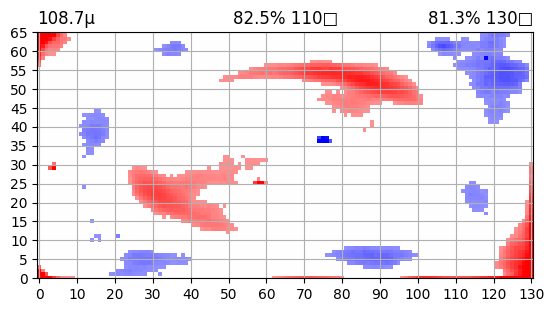

In [87]:
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)#(vmin=df.min().min(), vmax=df.max().max())
cmap = plt.get_cmap('bwr')
fig, ax = plt.subplots()
im = ax.imshow(df, cmap=cmap, norm=norm)

ax.set_xticks(np.arange(0, 131, step=10))
ax.set_yticks(np.arange(0, 131, step=5))
ax.set_title(str(round(m*1000,1))+"µ", loc='left') #makuatsu
ax.set_title(str(pall)+"% 130□", loc='right')
ax.set_title(str(pinn)+"% 110□", loc='center')
ax.grid()
ax.set_ylim(0, 65)#ax.set_xlim(-65,65)

print(file_name+".png")
plt.show()#fig.colorbar(im)

In [44]:
fig.savefig('my_graph.png')